## Importing the packages

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Input
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt

%matplotlib notebook

## Loading the dataset

In [3]:
mnist_data = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist_data.load_data()
print("Training data size: ", X_train.shape)
print("Testing data size: ", X_test.shape)

Training data size:  (60000, 28, 28)
Testing data size:  (10000, 28, 28)


## Normalizing the datasets

In [5]:
#normalization of dataset
X_train=(X_train)/255
X_test=(X_test)/255

#reshaping the dataset
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

#changing the traning and testing output to categorical 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data input size: ", X_train.shape)
print("Testing data input size: ", X_test.shape)
print("Training data target size: ", y_train.shape)
print("Testing data target size: ", y_test.shape)

Training data input size:  (60000, 784)
Testing data input size:  (10000, 784)
Training data target size:  (60000, 10)
Testing data target size:  (10000, 10)


## FNN model

In [15]:
model = Sequential([
    Dense(500, activation = 'relu', input_shape = [X_train.shape[1], ]),
    Dense(300, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(50, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_19 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_20 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_21 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                510       
Total params: 578,460
Trainable params: 578,460
Non-trainable params: 0
_________________________________________________________________


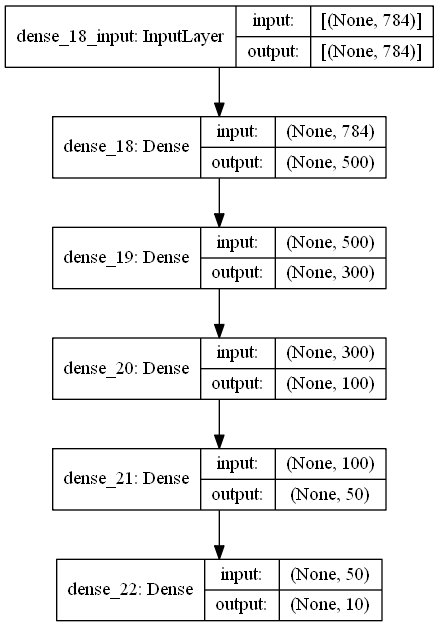

In [16]:
plot_model(model, show_shapes = True, show_layer_names = True, expand_nested = True)

In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = [keras.metrics.CategoricalAccuracy()])
history = model.fit(X_train, y_train, batch_size = 32, epochs = 50, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0498 - categorical_accuracy: 0.6345 - val_loss: 0.3451 - val_categorical_accuracy: 0.8942
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3013 - categorical_accuracy: 0.9089 - val_loss: 0.1970 - val_categorical_accuracy: 0.9400
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1828 - categorical_accuracy: 0.9454 - val_loss: 0.1506 - val_categorical_accuracy: 0.9539
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1333 - categorical_accuracy: 0.9581 - val_loss: 0.1317 - val_categorical_accuracy: 0.9604
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1095 - categorical_accuracy: 0.9665 - val_loss: 0.1262 - val_categorical_accuracy: 0.9624
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0882 - categorical_accuracy: 0.9717 - val_loss: 0.1026 - val_categorical_accuracy:

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0043 - categorical_accuracy: 0.9987 - val_loss: 0.1067 - val_categorical_accuracy: 0.9802
Epoch 50/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0072 - categorical_accuracy: 0.9976 - val_loss: 0.0972 - val_categorical_accuracy: 0.9827


## Plot:  training loss vs training iterations

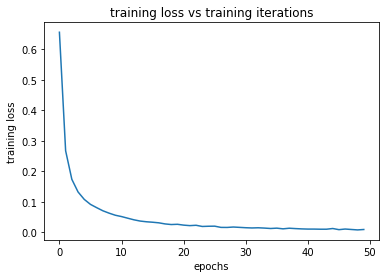

In [22]:
plt.plot(training.history['loss'])
plt.title('training loss vs training iterations')
plt.ylabel('training loss')
plt.xlabel('epochs')
plt.show()

## plot: test loss vs. training iterations

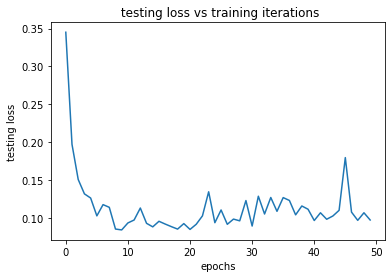

In [23]:
plt.plot(training.history['val_loss'])
plt.title(' testing loss vs training iterations')
plt.ylabel('testing loss')
plt.xlabel('epochs')
plt.show()